In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import model_from_json

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy

In [2]:
def toy_CNN(X_train, y_train, **kwargs):
        
    model = Sequential([
        Conv2D(filters=8, kernel_size=(8,8), strides=(4,4), activation='relu', input_shape=(384, 512, 3)),
        MaxPooling2D(pool_size=(8,8)),
        Conv2D(filters=8, kernel_size=(8,8), strides=(4,4), activation='relu'),
        Dropout(0.1),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
    history = model.fit(X_train, y_train, **kwargs)
    return model, history

In [3]:
X, y = [], []
folder = 'new-house-resized-dataset'
folder_list = os.listdir(folder)
nTotal = len(folder_list)
print('Available datapoints:', nTotal)
nTrash = 0
for file in folder_list:
    print('.',end='')
    trash = int(file.split('_')[0] == 'trash')
    img = Image.open(f'{folder}/{file}')
    arr = np.array(img)
    X.append(arr)
    y.append(trash)
    nTrash += trash

print()
print('Kept datapoints:', len(y))
print('Trash datapoints:', nTrash)
X, y = np.array(X), np.array(y)
print('done')

Available datapoints: 352
................................................................................................................................................................................................................................................................................................................................................................
Kept datapoints: 352
Trash datapoints: 118
done


In [4]:
def train_test_split(X, y, test_idx=None, test_size=0.2):
    ''' Split input data X and labels y into training and testing arrays '''
    n_list = list(range(len(y)))
    if test_idx is None:
        print('\n -- Performing NEW train-test split -- \n')
        test_idx = np.random.choice(n_list, replace=False, size=int(test_size*len(y)))
    else:
        test_idx = np.array(test_idx)
    train_idx = np.array([i for i in n_list if i not in test_idx])
    X_train = X[train_idx,:]
    X_test = X[test_idx,:]
    y_train = y[train_idx]
    y_test = y[test_idx]
    return X_train, y_train, X_test, y_test, test_idx

X_train, y_train, X_test, y_test, test_idx = train_test_split(X,y)
X_test.shape


 -- Performing NEW train-test split -- 



(70, 384, 512, 3)

In [9]:
#class_weight = {0:1, 1:100}
#print(class_weight)
toy_model, toy_hist = toy_CNN(X_train, y_train, verbose=True, epochs=20, validation_split=0.2,)
                                # class_weight = class_weight)

Epoch 1/20
8/8 [==============================] - 2s 201ms/step - loss: 18.0014 - accuracy: 0.7244 - val_loss: 3.8795 - val_accuracy: 0.7544
Epoch 2/20
8/8 [==============================] - 1s 137ms/step - loss: 2.6821 - accuracy: 0.7244 - val_loss: 11.7224 - val_accuracy: 0.1053
Epoch 3/20
8/8 [==============================] - 1s 136ms/step - loss: 1.1252 - accuracy: 0.8533 - val_loss: 3.9710 - val_accuracy: 0.2105
Epoch 4/20
8/8 [==============================] - 1s 133ms/step - loss: 0.3505 - accuracy: 0.8711 - val_loss: 1.6350 - val_accuracy: 0.3509
Epoch 5/20
8/8 [==============================] - 1s 143ms/step - loss: 0.2281 - accuracy: 0.9200 - val_loss: 0.9758 - val_accuracy: 0.4912
Epoch 6/20
8/8 [==============================] - 1s 137ms/step - loss: 0.2083 - accuracy: 0.9244 - val_loss: 1.1625 - val_accuracy: 0.4211
Epoch 7/20
8/8 [==============================] - 1s 144ms/step - loss: 0.1635 - accuracy: 0.9378 - val_loss: 1.4032 - val_accuracy: 0.3684
Epoch 8/20
8/8 [==

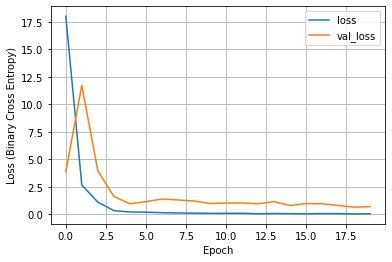

In [10]:
def plot_loss(hist):
    plt.figure()
    plt.plot(hist.history['loss'], label='loss')
    plt.plot(hist.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (Binary Cross Entropy)')
    plt.legend()
    plt.grid(True)
    
plot_loss(toy_hist)

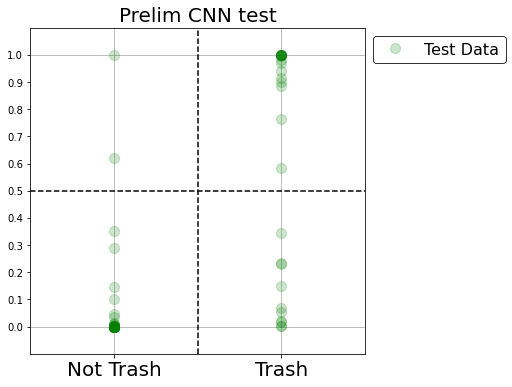

In [20]:
y_pred = np.round(toy_model.predict(X_test), 4)
plt.figure(figsize=(6,6))
plt.plot(y_test, y_pred, 'o', label='Test Data', ms=10, alpha=0.2, c='green')
plt.axvline(x=0.5, ls='--', c='k')
plt.axvline(x=0, ls='-', c='grey', zorder=0, lw=0.5)
plt.axvline(x=1, ls='-', c='grey', zorder=0, lw=0.5)
plt.axhline(y=0.5, ls='--', c='k')
plt.axhline(y=0, ls='-', c='grey', zorder=0, lw=0.5)
plt.axhline(y=1, ls='-', c='grey', zorder=0, lw=0.5)
plt.xlim(-0.5,1.5)
plt.xticks([0,1],['Not Trash', 'Trash'], size=20)
plt.ylim(-0.1,1.1)
plt.yticks(np.arange(0,1.01,0.1))
plt.legend(bbox_to_anchor=(1,1), loc='upper left', edgecolor='k', fontsize=16)
plt.title('Prelim CNN test', size=20)
None

In [15]:
y_pred_round = [int(np.round(a)) for a in y_pred]
print('Trash (1) vs. Non-Trash (0) Binary Classifier trained on New House data')
print('\nConfusion matrix:\n', confusion_matrix(y_test, y_pred_round))
print('\nAccuracy:', accuracy(y_test, y_pred_round))

Trash (1) vs. Non-Trash (0) Binary Classifier trained on New House data

Confusion matrix:
 [[41  2]
 [10 17]]

Accuracy: 0.8285714285714286


In [26]:
np.save('911_X_train', X_train)
np.save('911_y_train', y_train)
np.save('911_X_test', X_test)
np.save('911_y_test', y_test)

In [28]:
toy_model_json = toy_model.to_json()
with open('911_toy_model.json', 'w') as jf:
    jf.write(toy_model_json)
toy_model.save_weights('911_toy_model.h5')

In [30]:
# from tensorflow.keras.models import model_from_json
with open('911_toy_model.json') as jf:
    json = jf.read()
loaded_model = model_from_json(json)
loaded_model.load_weights('911_toy_model.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 95, 127, 8)        1544      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 15, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 2, 8)           4104      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 2, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 5,665
Trainable params: 5,665
Non-trainable params: 0
____________________________________________________

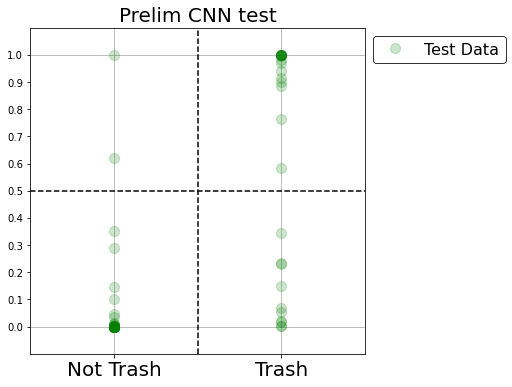

In [31]:
y_pred = np.round(toy_model.predict(X_test), 4)
plt.figure(figsize=(6,6))
plt.plot(y_test, y_pred, 'o', label='Test Data', ms=10, alpha=0.2, c='green')
plt.axvline(x=0.5, ls='--', c='k')
plt.axvline(x=0, ls='-', c='grey', zorder=0, lw=0.5)
plt.axvline(x=1, ls='-', c='grey', zorder=0, lw=0.5)
plt.axhline(y=0.5, ls='--', c='k')
plt.axhline(y=0, ls='-', c='grey', zorder=0, lw=0.5)
plt.axhline(y=1, ls='-', c='grey', zorder=0, lw=0.5)
plt.xlim(-0.5,1.5)
plt.xticks([0,1],['Not Trash', 'Trash'], size=20)
plt.ylim(-0.1,1.1)
plt.yticks(np.arange(0,1.01,0.1))
plt.legend(bbox_to_anchor=(1,1), loc='upper left', edgecolor='k', fontsize=16)
plt.title('Prelim CNN test', size=20)
None

In [38]:
arr = np.load('911_X_test.npy')
np.sum(arr != X_test)

0